<a href="https://colab.research.google.com/github/pratikshamor/EDA1_Capston-Project_Play-Store-App-Review-Analysis/blob/main/Individual_GCollab_EDA_1_Play_Store_App_Review_Analysis_EDA1_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#>**Agenda**

**Discussion of Google play store dataset will involve various steps such as:**

1) Loading the data into data frame.

2) Finding out the basic information about the data.

3) Cleaning the data(Check for null or missing values in the dataset).

4) Extracting statistics from the dataset.

5) Exploratory analysis and visualizations.

6) Conclusion.

**Question Should be mention in our project**

Q1. What is the count of applications in each category differentiated by their type?

Q2. Overall Comparison of Category & install

Q8.What is the count of Rating in each category differentiated by Customer Ratings? Provide ten coins to paid and unpaid apps.


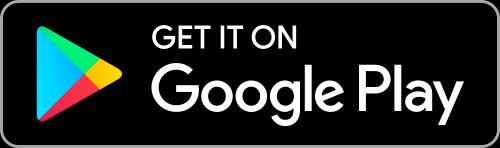

### **1) Loading the data into data frame.**

In [6]:
# Important Liabraries that we are using in our project.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import date
import seaborn as sns

In [8]:
#mount drive and read csv file
from google.colab import drive
drive.mount('/content/drive')

playstore_data = pd.read_csv('/content/drive/MyDrive/EDA1_Python Project/Play Store Data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Print the first five lines of the play store data
playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Print the last five lines of the play store data
playstore_data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


##**2) Finding out the basic information about the data.**

In [ ]:
playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Shape of the overall data
playstore_data.shape

(10841, 13)

In [ ]:
# Find Size of data
playstore_data.size

140933

In [ ]:
# Columns present in playstore data
playstore_data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Whole data describe rating only because it has only Numeric  values.
playstore_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


## **3) Cleaning the data (Check for null or missing values in the dataset)**

In [ ]:
missing_value_counts = playstore_data.isnull().sum()
missing_value_counts[:]

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**From the above observations, we noted that:**

1) There are 1487 Null or missing values as stated under the ‘Non-Null Count’

2) Data has 10841 rows and 13 columns.

## **4) Extracting statistics from the dataset.**

#**Q1. What is the count of applications in each category differentiated by their type?**

In [ ]:
category_count = playstore_data['Category'].value_counts()

**1.1.Category wise count of no of applications**

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.,
        2250.]), <a list of 10 Text major ticklabel objects>)

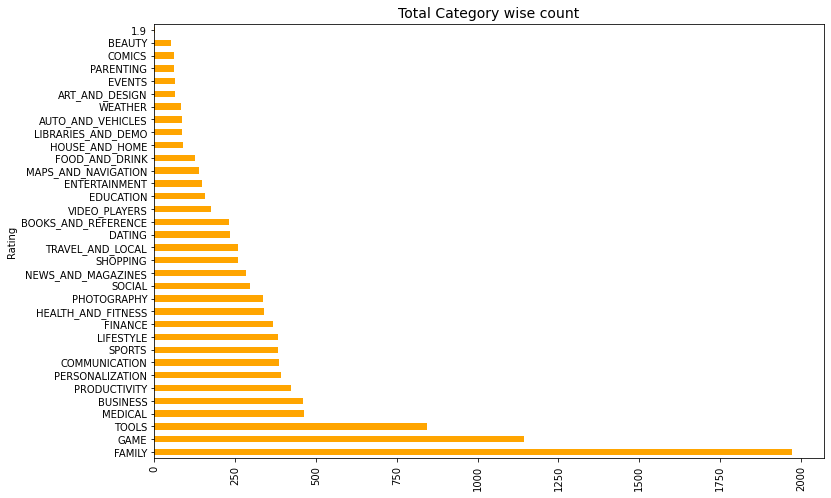

In [ ]:
# category wise count of no of applications
category_count.plot(kind='barh',figsize = (12,8),fontsize = 10,color = 'Orange')

plt.title('Total Category wise count',fontsize = 14)
plt.ylabel('Rating')
plt.xticks(rotation=90)

From the above two plots we can conclude that, maximum number of apps present in google play store comes under Family, Games and Tools Category but as per the installations and requirements in the market place, this is not the case. Maximum installed apps comes under Games, Communication and Tools.

**1.2.Category wise percentage of no of applications**

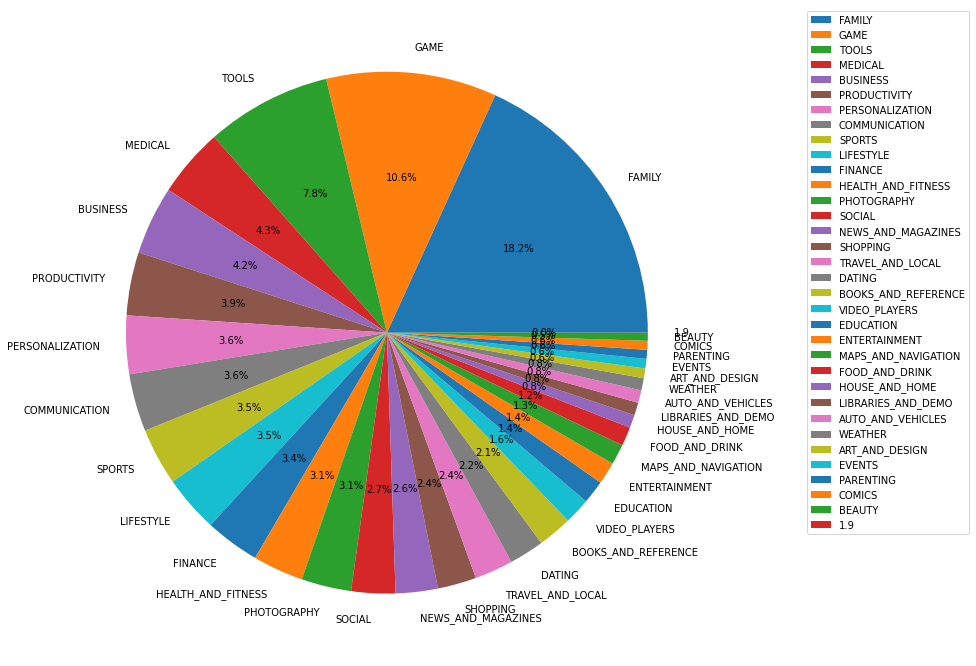

In [ ]:
# category wise percentage of no of applications
# Draw Pie chart of category wise distribution of applications
temp = playstore_data['Category'].value_counts().reset_index()
plt.figure(figsize=(12,12))
ax = plt.subplot(111)
plt.pie(x = temp['Category'], labels= temp['index'],autopct= '%1.1f%%')
plt.legend()
ax.legend(bbox_to_anchor=(1.4, 1))
plt.show()




Observation: (Pie Chart) The FAMILY, GAMES and TOOLS are the most dominating applications in the playstore.

From the above two plots we can conclude that, maximum number of apps present in google play store comes under Family, Games and Tools Category but as per the installations and requirements in the market place, this is not the case. Maximum installed apps comes under Family, Games and Tools.


In [ ]:
data1 = playstore_data.head()
data2 = playstore_data.tail()
concat_data = pd.concat([data1,data2],axis=0,ignore_index=True)
concat_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
6,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
7,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
8,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
9,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# Categories in play store data
playstore_data['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

'1.9' is wrong value. So I have to see in which rows '1.9' corresponds to.

In [ ]:
# Uniqe ratings in the data
playstore_data['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
        3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
        1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

In [ ]:
# Reviews in the data
playstore_data['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [ ]:
# common applications size
playstore_data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
# No of Installs
playstore_data['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [ ]:
# Price of paid apps
playstore_data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [ ]:
#Last updates of apps
playstore_data['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

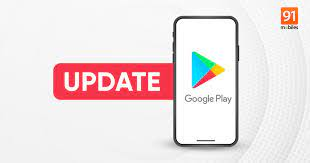

In [ ]:
playstore_data['Installs'].min(),playstore_data['Installs'].max()

('0', 'Free')

##**>Checking the duplicate values**

In [ ]:
print("Number of Unique App names = ", len(playstore_data['App'].unique()))
print("Duplicate Apps = ",len(playstore_data['App'])- len(playstore_data['App'].unique()))
print("NUMBER of the Total App name = ", playstore_data.shape[0])

Number of Unique App names =  9660
Duplicate Apps =  1181
NUMBER of the Total App name =  10841



#**Q2. Comparison top 32 Category present in the google play store as per their installation ?**

In [ ]:
top_Category = playstore_data.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})
Category_installs = playstore_data.groupby(['Category'])[['Installs']].sum()

top_Category_installs = pd.merge(top_Category, Category_installs, on='Category')
top_32_Category_installs = top_Category_installs.head(32)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


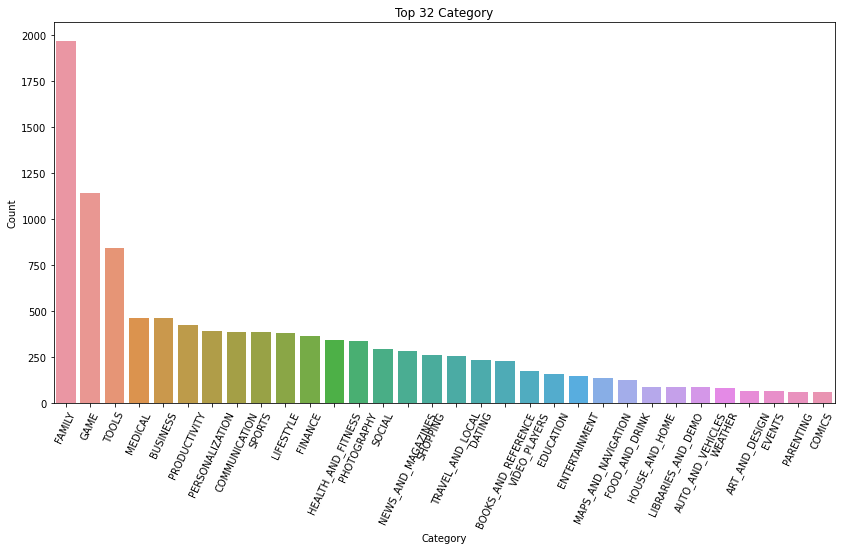

In [ ]:
# Grapical representation of the installation category wise count
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Category")
plt.ylabel("Number of application")
plt.title("Top 32 Category")
sns.barplot(top_32_Category_installs.Category,top_32_Category_installs.Count)
plt.show()

This graph shows the distribution of top 32 categories vs the count of installation of the categories. 
Here family has the most number of installation as compare to others.

#**Q3. What are the top 32 apps present in the google play store as per their Genres?**

Geners is the types of applications so it useful for user to search apps classification wise

In [ ]:
top_genres = playstore_data.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})
genres_installs = playstore_data.groupby(['Genres'])[['Installs']].sum()

top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_32_genres_installs = top_genres_installs.head(32)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


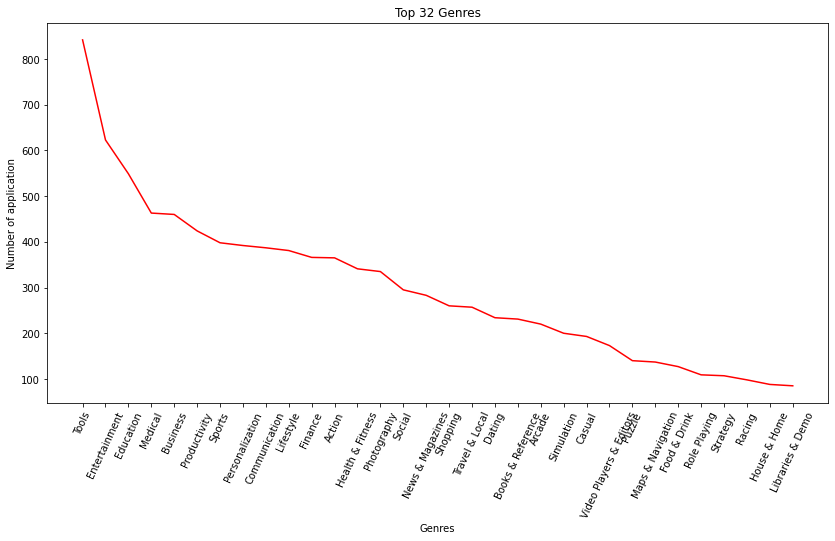

In [ ]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 32 Genres")
sns.lineplot(top_32_genres_installs.Genres, top_32_genres_installs.Count,color='Red')
plt.show()

In the previous Graph we have seen that the rating of family category is high but in this the Genres type Tools is high.

#**Q4 .What is the count of Rating in each category differentiated by Customer Ratings?**


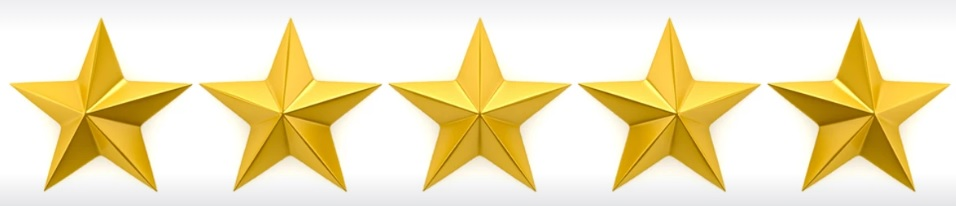

**For every customer who provide the rating for them we provide the ten coins for each star**

In [ ]:
print("Please provide rating 1 to 5 star's")
stars = int(input())

Please provide rating 1 to 5 star's
4


In [ ]:
star_list = []
star_list.append(stars)
total_stars = '_*_' * stars

if stars in star_list == 1:stars
elif stars in star_list == 2:stars
elif stars in star_list == 3:stars
elif stars in star_list == 4:stars
elif stars in star_list == 5:stars

In [ ]:
print(f'for {total_stars} stars You Get {stars*10} coins for next purchase')

for _*__*__*__*_ stars You Get 40 coins for next purchase


**Comparison top 32 Category present in the google play store as per their Ratings ?**

In [ ]:
top_Category = playstore_data.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})
Category_rating = playstore_data.groupby(['Category'])[['Rating']].sum()

top_Category_rating = pd.merge(top_Category, Category_rating, on='Category')

# need to find sum of each category except 1.9
top_32_Category_rating = top_Category_rating.head(32)

In [ ]:
top_32_Category_rating.head()

,Category,Count,Rating
0,FAMILY,1972,7323.9
1,GAME,1144,4702.1
2,TOOLS,843,2970.8
3,MEDICAL,463,1466.2
4,BUSINESS,460,1248.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


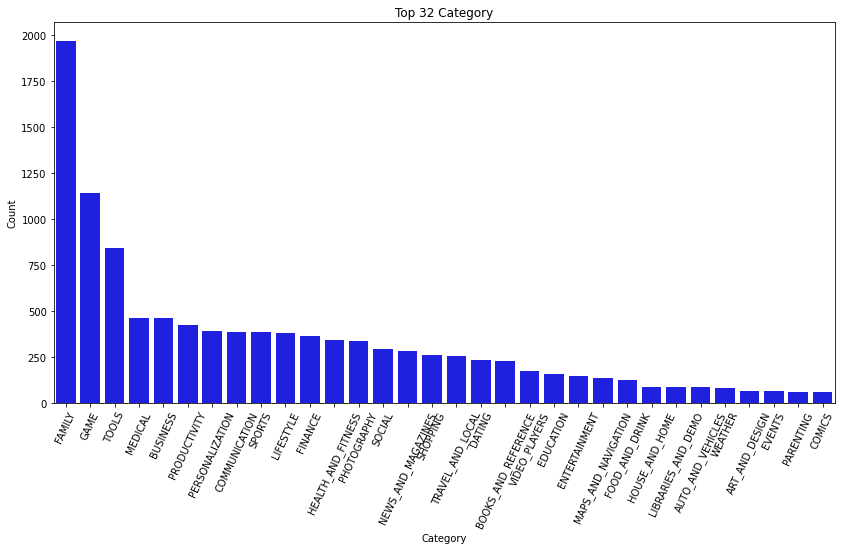

In [ ]:
# Grapical representation of the ratings category wise count
plt.figure(figsize=(14,7))
plt.xticks(rotation=65)
plt.xlabel("Category")
plt.ylabel("Number of Ratings")
plt.title("Top 32 Category")
sns.barplot(top_32_Category_rating.Category,top_32_Category_rating.Count,color='Blue')
plt.show()

In [ ]:
top_32_rating = top_32_Category_rating['Rating'].sum()
print(f'Total sum of all the category wise rating is {top_32_rating} Coins')

Total sum of all the category wise rating is 39080.3 Coins


We impliment one addition in this previous data, from playstore we provide some benifits to customers

Rating wise we distribute ten coins to each customer,so total no of coins need to invest by playstore company is

In [ ]:
print(f'From data we find the Total number of coins playstore need to pay {top_32_rating*10}')

From data we find the Total number of coins playstore need to pay 390803.0


##**From data we find the Total number of coins playstore need to pay 390803.0 Coins**

# **Q5.Reviews for paid and unpaid applications**

In [ ]:
pd_type = playstore_data['Type'].value_counts()
print(pd_type)

Free    10039
Paid      800
0           1
Name: Type, dtype: int64


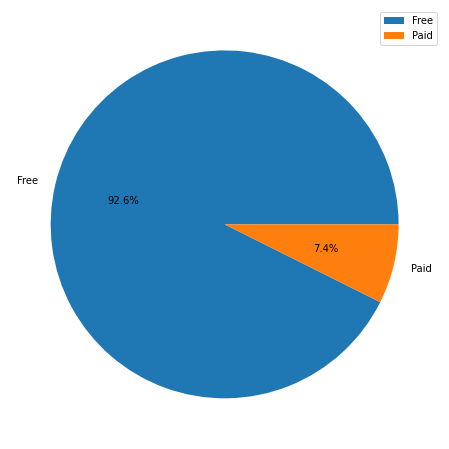

In [ ]:
# Creating Dataset
Type = ['Free','Paid']
Data = [10039,800]
# Creating plot
fig = plt.figure(figsize =(20, 8))
plt.pie(Data, labels = Type,autopct='%0.1f%%')
plt.legend()
ax.legend(bbox_to_anchor=(1.4, 1))

# show plot
plt.show()

We can clearly see the percentage difference between both of them as Free contains more percentage than Paid

## **Q6.Comparison of positive,negative and neutral sentiments**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Import Second File
user_review = pd.read_csv('/content/drive/MyDrive/EDA1_Python Project/User Reviews.csv')

In [ ]:
user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# Comparison of positive,negative and neutral sentiments
sentiments = user_review['Sentiment'].value_counts()
print(sentiments)

Positive    23998
Negative     8271
Neutral      5163
Name: Sentiment, dtype: int64


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

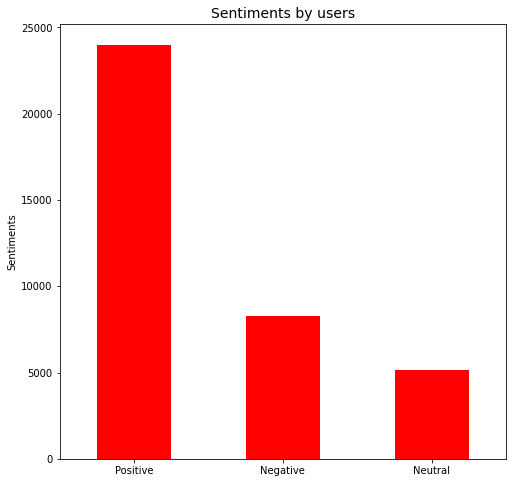

In [ ]:
# Plot graphical representation
sentiments.plot(kind='bar',figsize = (8,8),fontsize = 10,color = 'Red')

plt.title('Sentiments by users',fontsize = 14)
plt.ylabel('Sentiments')
plt.xticks(rotation=0)

It can be seen from the above plot that the number of positive reviews are way higher than negative and neutral ones.

#**Q8. Anderoid versions different types**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AxesSubplot(0.125,0.125;0.775x0.755)


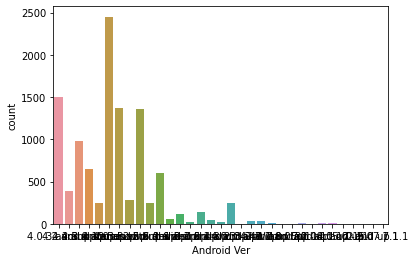

In [ ]:
AV=sns.countplot(playstore_data['Android Ver'])
print(AV)

From above graphs it shows the lots of versions used shown in x axis from this we find maximun count of versions

#**Conclusion**



>From the given data we have concluded lots of outputs which make us easy to   
understand and get the actual calculations of data comparing with category.

>We have  also understand the actual data analysis and how to take insides from the data and prepare understandable work for present.

>The dataset contains possibilities to deliver insights to understand customer demands better and thus help developers to popularize the product. Dataset can also be used to look whether the original ratings of the play store












# **Thank You**